In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn nltk gensim pyLDAvis



  Using cached gensim-4.3.3.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + c:\Users\SAHIL\AppData\Local\Programs\Python\Python313\python.exe C:\Users\SAHIL\AppData\Local\Temp\pip-install-w7msho20\numpy_29c861baf93e4c5d91d288940f48a046\vendored-meson\meson\meson.py setup C:\Users\SAHIL\AppData\Local\Temp\pip-install-w7msho20\numpy_29c861baf93e4c5d91d288940f48a046 C:\Users\SAHIL\AppData\Local\Temp\pip-install-w7msho20\numpy_29c861baf93e4c5d91d288940f48a046\.mesonpy-3j7wq2zt -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\SAHIL\AppData\Local\Temp\pip-install-w7msho20\numpy_29c861baf93e4c5d91d288940f48a046\.mesonpy-3j7wq2zt\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\SAHIL\AppData\Local\Temp\pip-install-w7msho20\numpy_29c861baf93e4c5d91d288940f48a046
      Build dir: C:\Users\SAHIL\AppData\Local\Temp\pip-install-w7m

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


📥 Loading dataset...
🧹 Preprocessing text...
🔢 Vectorizing documents...
📊 Applying KMeans clustering...
🎨 Visualizing clusters with t-SNE...


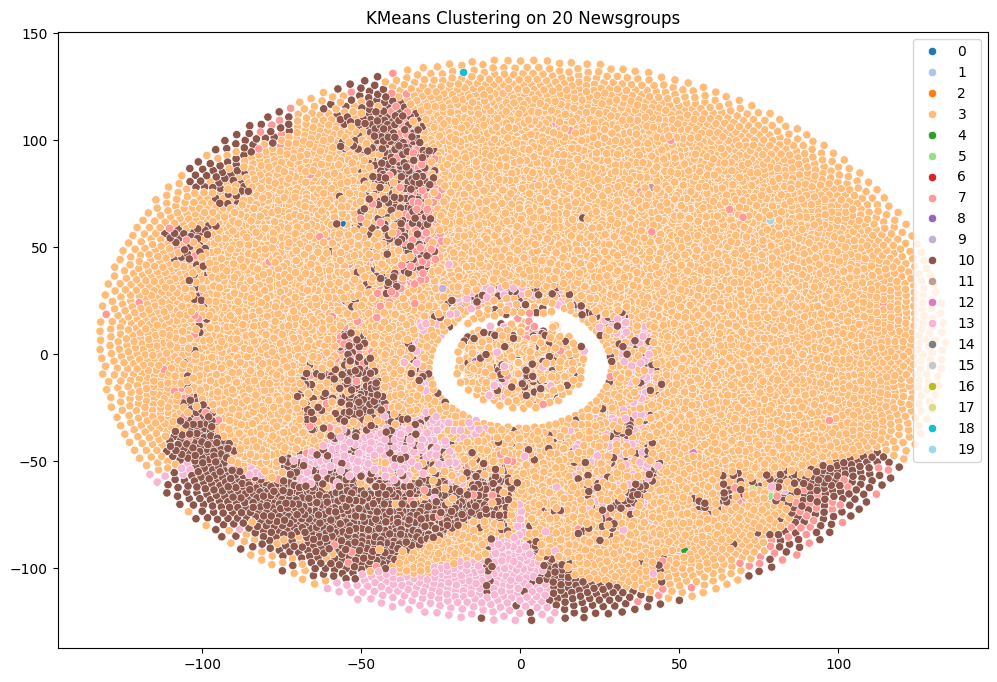

🧠 Training LDA model...

🧾 Top words per topic:

Topic #1:
ice beat time lead night best series fan hockey game

Topic #2:
work year power make used problem time good car like

Topic #3:
include circuit value use input window entry application widget output

Topic #4:
tax clipper security encryption chip public use law government key

Topic #5:
true say mean way answer think read people point question

Topic #6:
sin belief faith religion christ bible church jesus christian god

Topic #7:
sun faq version com memory pub available server ftp edu

Topic #8:
new 1992 research number page april book university information 1993

Topic #9:
project satellite data launch center mission earth nasa program space

Topic #10:
ride university mail internet san send bike list com edu

Topic #11:
people crime law weapon government country president right state gun

Topic #12:
going want thing say time said like think know people

Topic #13:
user problem disk program card software use drive window file


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('wordnet')

print("📥 Loading dataset...")
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = newsgroups.data

print("🧹 Preprocessing text...")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and len(word) > 2]
    return ' '.join(words)

docs_cleaned = [preprocess(doc) for doc in docs]

print("🔢 Vectorizing documents...")
tfidf = TfidfVectorizer(max_df=0.7, min_df=10, stop_words='english')
X_tfidf = tfidf.fit_transform(docs_cleaned)

count_vectorizer = CountVectorizer(max_df=0.7, min_df=10, stop_words='english')
X_count = count_vectorizer.fit_transform(docs_cleaned)

print("📊 Applying KMeans clustering...")
k = 20
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_tfidf)
clusters = km.labels_

print("🎨 Visualizing clusters with t-SNE...")
tsne_model = TSNE(n_components=2, perplexity=50, random_state=0)
tsne_data = tsne_model.fit_transform(X_tfidf.toarray())  # ✅ FIXED: use toarray()

plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=clusters, palette='tab20', legend='full')
plt.title('KMeans Clustering on 20 Newsgroups')
plt.show()

print("🧠 Training LDA model...")
lda_model = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(X_count)

print("\n🧾 Top words per topic:")
terms = count_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic #{idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))
